Q4. Campaign Impact Analysis 

○ What are the key performance indicators (KPIs) for assessing the success of
marketing campaigns?
○ Objective: Develop a framework for measuring campaign success using data
such as engagement rate, conversion rate, and customer lifetime value (CLV).
○ Expected Outcome: Propose actionable insights on how to improve marketing
Strategies.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Importing Data
df_campaigns = pd.read_csv("../Data DSA3101/campaigns.csv")
df_engagement = pd.read_csv("../Data DSA3101/customer_engagement.csv")
df_churn_prob = pd.read_excel("../Data DSA3101/churn_probability.xlsx")
df_transactions = pd.read_csv("../Data DSA3101/transactions_summary.csv")

In [49]:
#Data cleaning and preprocessing
df = df_transactions.merge(df_engagement,on="customer_id",how="left")
df = df.merge(df_churn_prob,on="customer_id",how="left")
df = df.merge(df_campaigns[["campaign_id", "campaign_name"]], on="campaign_id", how="left")

binary_columns = ['sent','delivered','opened','clicked','conversion_status']
df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

df["engagement_time"] = pd.to_timedelta(df['engagement_time']).dt.total_seconds()
print(df.head())
df['engagement_time']

   customer_id  days_since_last_transaction  current_balance  peak_month  \
0            1                           11      5694.487702          11   
1            2                           55      1738.012820           6   
2            2                           55      1738.012820           6   
3            2                           55      1738.012820           6   
4            2                           55      1738.012820           6   

   peak_month_spending  peak_month_frequency  total_transactions_3m  \
0         12893.350846                    48                     95   
1          2084.299245                    30                    106   
2          2084.299245                    30                    106   
3          2084.299245                    30                    106   
4          2084.299245                    30                    106   

   total_transactions_6m  total_transactions_12m  total_transaction_amount_3m  \
0                    217           

C:\Users\emily\AppData\Local\Temp\ipykernel_29608\3720548476.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})


0        59849.0
1        55473.0
2        40838.0
3        40596.0
4        50115.0
          ...   
29535    37450.0
29536    59919.0
29537    46813.0
29538    53720.0
29539    44255.0
Name: engagement_time, Length: 29540, dtype: float64

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29540 entries, 0 to 29539
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      29540 non-null  int64  
 1   days_since_last_transaction      29540 non-null  int64  
 2   current_balance                  29540 non-null  float64
 3   peak_month                       29540 non-null  int64  
 4   peak_month_spending              29540 non-null  float64
 5   peak_month_frequency             29540 non-null  int64  
 6   total_transactions_3m            29540 non-null  int64  
 7   total_transactions_6m            29540 non-null  int64  
 8   total_transactions_12m           29540 non-null  int64  
 9   total_transaction_amount_3m      29540 non-null  float64
 10  total_transaction_amount_6m      29540 non-null  float64
 11  total_transaction_amount_12m     29540 non-null  float64
 12  average_transactio

In [51]:
print(df.describe())

        customer_id  days_since_last_transaction  current_balance  \
count  29540.000000                 29540.000000     29540.000000   
mean    5010.844821                    23.494381      6793.870851   
std     2887.939591                    35.462239      4675.937998   
min        1.000000                     0.000000     -2776.332936   
25%     2512.000000                     4.000000      3625.809532   
50%     5019.500000                    14.000000      5875.701446   
75%     7502.250000                    26.000000      8875.066186   
max    10000.000000                   200.000000     39748.029652   

         peak_month  peak_month_spending  peak_month_frequency  \
count  29540.000000         29540.000000          29540.000000   
mean       6.595701         16699.666485             43.233717   
std        3.585805         17534.768893             11.515244   
min        1.000000         -6275.590451             12.000000   
25%        3.000000          5997.673471        

In [52]:
df_sent = df[df["sent"]==1]
df_m= (
    df_sent.groupby('campaign_name').agg(
      deliver_rate = ('delivered','mean'),
      open_rate = ('opened','mean'),
      click_rate = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean'),
      engagement_time_mean = ('engagement_time', 'mean'))
      .reset_index()
)

df_m["engagement_time_scaled"] = (df_m["engagement_time_mean"] - df_m["engagement_time_mean"].min()) / (
    df_m["engagement_time_mean"].max() - df_m["engagement_time_mean"].min()
)

df_m["engagement_score"] = (
    0.3 * df_m["open_rate"] +
    0.5 * df_m["click_rate"] +
    0.2 * df_m["engagement_time_scaled"]
)

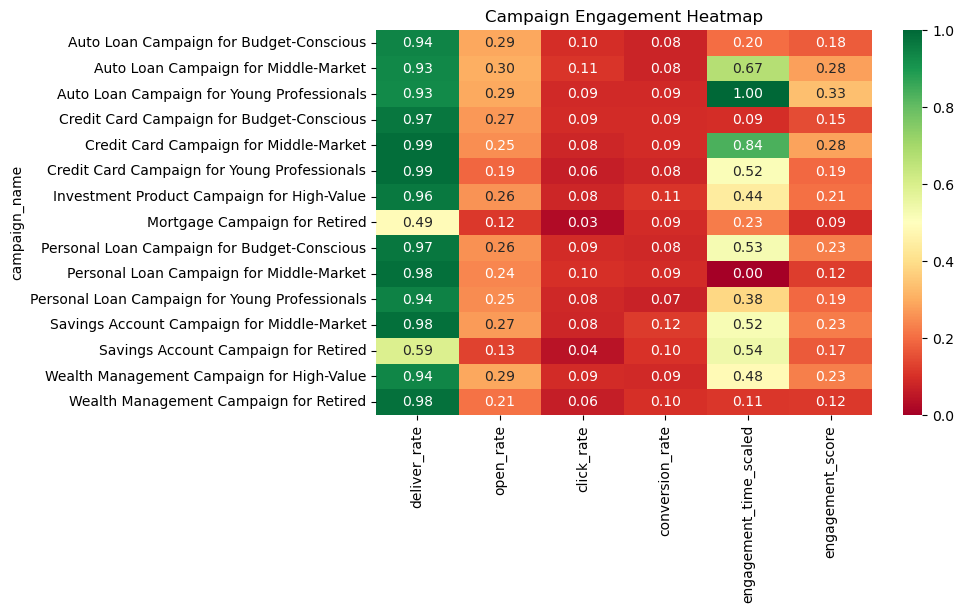

In [53]:
df_plt = df_m.drop("engagement_time_mean",axis=1)
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_plt.set_index("campaign_name"),
    annot=True, cmap="RdYlGn", fmt=".2f"
)
plt.title("Campaign Engagement Heatmap")
plt.show()


In [54]:
profit_generated = (
  df_campaigns.groupby('campaign_name').agg(
    total_revenue = ('total_revenue_generated','sum'),
    total_campaign_cost=('total_campaign_cost','sum')
  )
  .assign(total_profit = lambda x:(x['total_revenue']-x['total_campaign_cost']))
  .reset_index()
  .sort_values(by="total_profit")
)

print(profit_generated)

                                     campaign_name  total_revenue  \
2       Auto Loan Campaign for Young Professionals       29154.99   
5     Credit Card Campaign for Young Professionals       86319.79   
3        Credit Card Campaign for Budget-Conscious      104820.46   
12            Savings Account Campaign for Retired      237154.71   
1             Auto Loan Campaign for Middle-Market      248382.54   
7                    Mortgage Campaign for Retired      392904.32   
9         Personal Loan Campaign for Middle-Market      280866.72   
0          Auto Loan Campaign for Budget-Conscious      285963.10   
10  Personal Loan Campaign for Young Professionals      302228.22   
6       Investment Product Campaign for High-Value      385408.90   
13       Wealth Management Campaign for High-Value      404706.95   
8      Personal Loan Campaign for Budget-Conscious      499335.86   
4           Credit Card Campaign for Middle-Market      462859.89   
11      Savings Account Campaign f

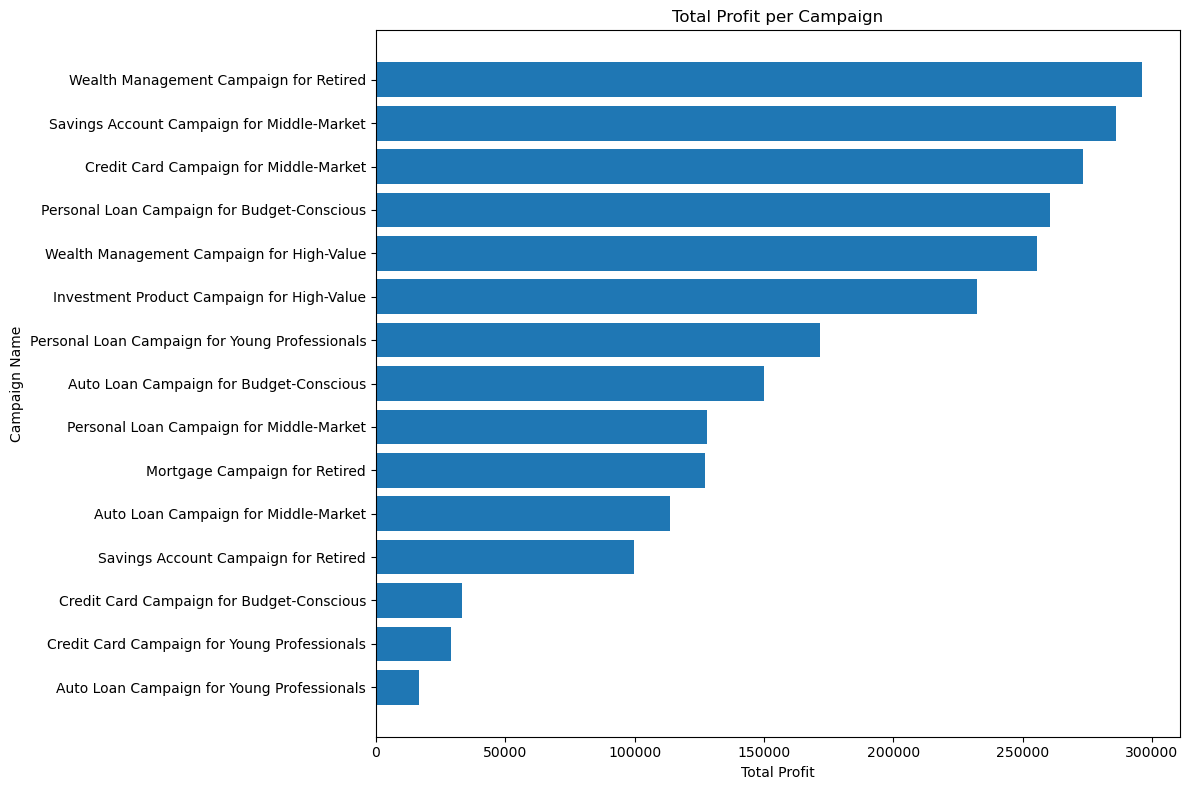

In [55]:
campaigns = profit_generated['campaign_name']
total_profits = profit_generated['total_profit']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(campaigns, total_profits)

# Labels & title
plt.xlabel('Total Profit')
plt.ylabel('Campaign Name')
plt.title('Total Profit per Campaign')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
df_m= df_m.merge(profit_generated,on="campaign_name")

In [57]:
#filtering values
df_converted = df[df["conversion_status"]==1].copy()
df_converted_churn = df_converted[df_converted["churn_prob"]>0].copy()

#expectedlifetime of customer = 1/churn probability
#clv = monthly revenue * expected lifetime of customer
df_converted_churn["monthly_revenue"] = df_converted_churn["total_transaction_amount_12m"]/12
df_converted_churn["expected_lifetime"] = 1/df_converted_churn['churn_prob']
df_converted_churn["clv"]= df_converted_churn["monthly_revenue"] * df_converted_churn["expected_lifetime"]
clv_per_camp = df_converted_churn.groupby(["campaign_name"])["clv"].mean().mul(1/1000).reset_index().sort_values(by="clv")

clv_per_camp

#merge clv into main df_m
df_m=df_m.merge(clv_per_camp,on="campaign_name")

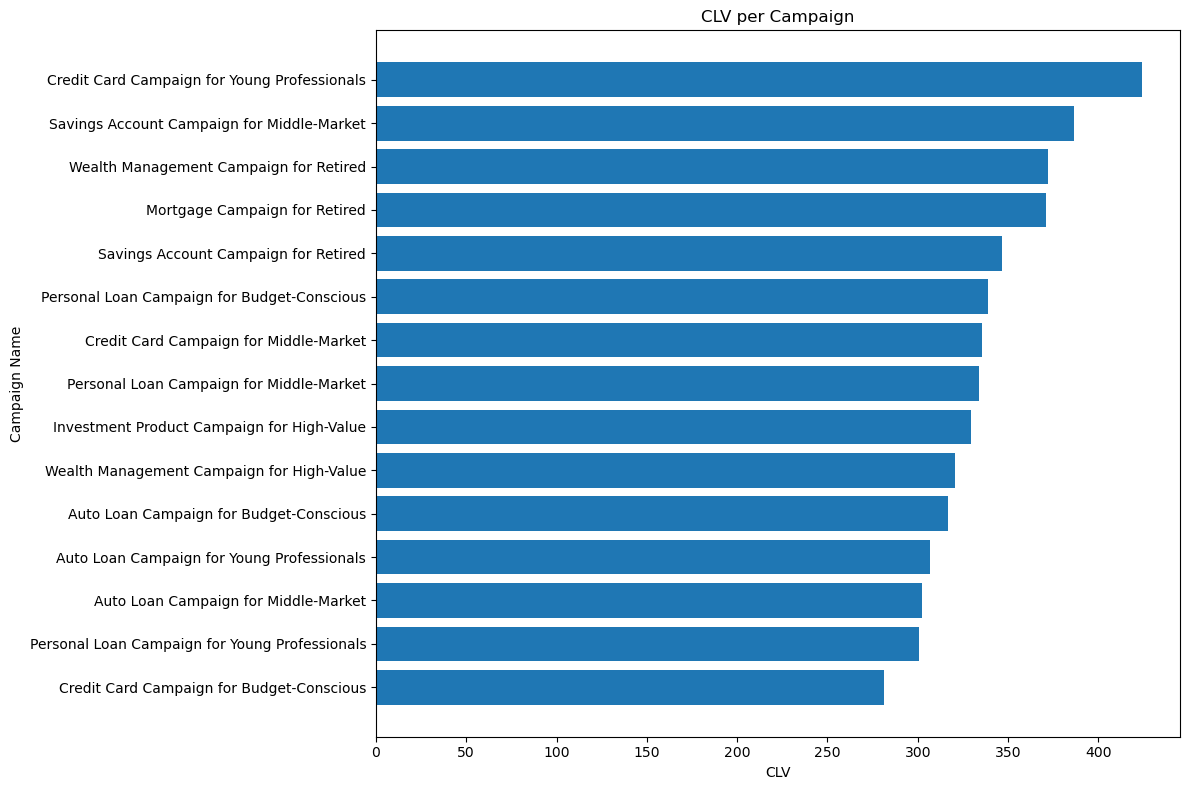

In [58]:
campaigns = clv_per_camp['campaign_name']
clv = clv_per_camp['clv']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(campaigns, clv)

# Labels & title
plt.xlabel('CLV')
plt.ylabel('Campaign Name')
plt.title('CLV per Campaign')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

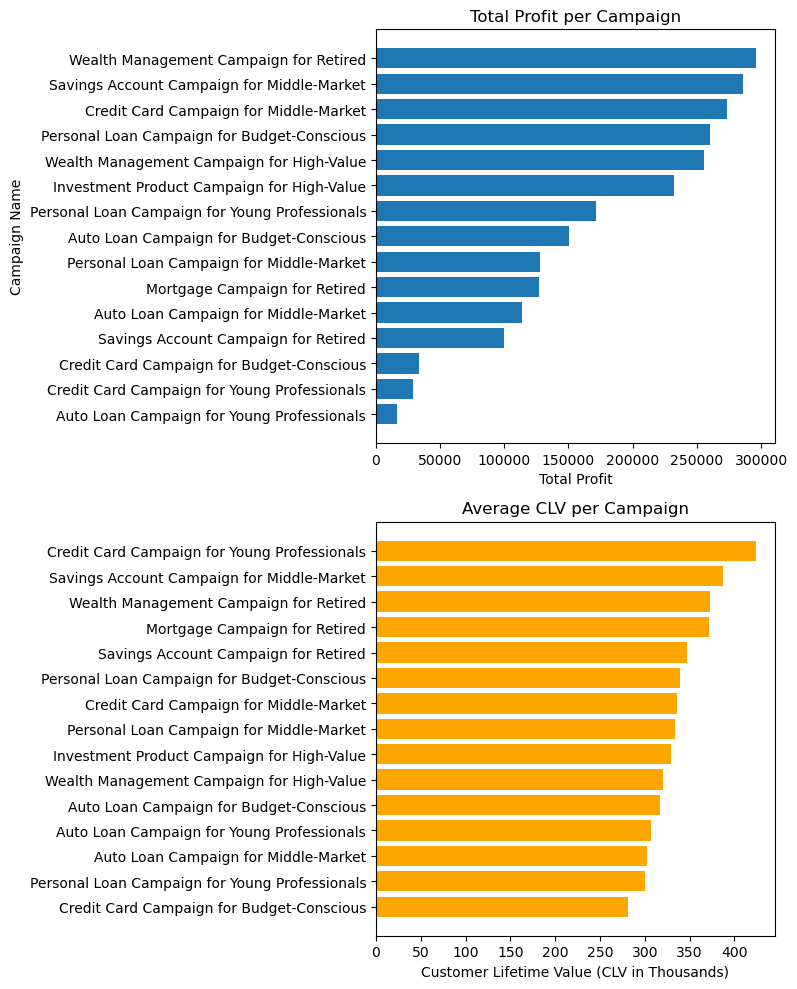

In [59]:
campaigns1 = profit_generated['campaign_name']
total_profits = profit_generated['total_profit']

campaigns2 = clv_per_camp['campaign_name']
clv = clv_per_camp['clv']

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(2, 1, figsize=(8, 10))  # Adjust figsize as needed

# Plot 1: Total Profit per Campaign
ax[0].barh(campaigns1, total_profits)
ax[0].set_xlabel('Total Profit')
ax[0].set_ylabel('Campaign Name')
ax[0].set_title('Total Profit per Campaign')

# Plot 2: CLV per Campaign
ax[1].barh(campaigns2, clv, color='orange')  # Optional: change color for contrast
ax[1].set_xlabel('Customer Lifetime Value (CLV in Thousands)')
ax[1].set_ylabel('')  # Skip to avoid duplication
ax[1].set_title('Average CLV per Campaign')

# Adjust layout
plt.tight_layout()

# Show both plots together
plt.show()

In [60]:
df_m[["engagement_score", "conversion_rate", "clv", "total_profit"]].corr()


,engagement_score,conversion_rate,clv,total_profit
engagement_score,1.000000,-0.159474,-0.272817,0.006437
conversion_rate,-0.159474,1.000000,0.352952,0.373096
clv,-0.272817,0.352952,1.000000,0.169031
total_profit,0.006437,0.373096,0.169031,1.000000


Text(0.5, 1.0, 'CLV vs Total Profit by Campaign')

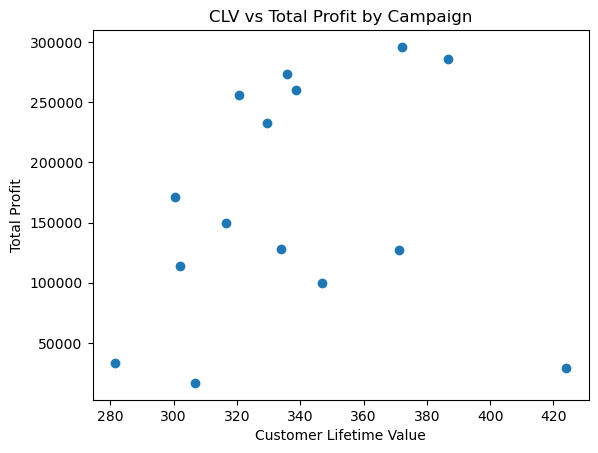

In [61]:


plt.scatter(df_m["clv"], df_m["total_profit"])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Total Profit")
plt.title("CLV vs Total Profit by Campaign")


In [62]:
customer_data = pd.read_csv("../Data DSA3101/filtered_customers_with_clusters.csv")

customer_data.head()

,customer_id,age,job,marital,education,credit_default,customer_segment,region,income,credit_card,personal_loan,mortgage,savings_account,investment_product,auto_loan,wealth_management,Cluster
0,1,38,blue-collar,married,secondary,0,High-Value,Urban,2603,1,1,1,1,1,1,1,1
1,3,73,services,divorced,secondary,0,Budget-Conscious,Urban,3130,1,0,0,0,1,1,0,0
2,4,87,retired,married,primary,0,Retired,Urban,2401,1,1,0,1,0,0,0,0
3,6,46,technician,married,tertiary,0,Middle-Market,Urban,3355,1,1,0,1,0,1,1,1
4,7,70,admin,married,tertiary,0,Budget-Conscious,Urban,4918,1,1,1,1,0,1,0,0


In [63]:
df2 = customer_data.merge(df_engagement,on="customer_id")
binary_columns = ['sent','delivered','opened','clicked','conversion_status']
df2[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

df2["engagement_time"] = pd.to_timedelta(df2['engagement_time']).dt.total_seconds()
df2.head()

,customer_id,age,job,marital,education,credit_default,customer_segment,region,income,credit_card,...,engagement_id,campaign_id,channel,sent,delivered,opened,clicked,engagement_date,engagement_time,conversion_status
0,1,38,blue-collar,married,secondary,0,High-Value,Urban,2603,1,...,28004,49,Mobile App Notifications,1.0,1.0,0.0,1.0,2023-07-05 16:37:29,59849.0,1.0
1,4,87,retired,married,primary,0,Retired,Urban,2401,1,...,9113,15,Mobile App Notifications,1.0,1.0,0.0,0.0,2024-01-04 14:49:24,53364.0,0.0
2,4,87,retired,married,primary,0,Retired,Urban,2401,1,...,11251,20,Mobile App Notifications,1.0,1.0,0.0,1.0,2023-07-28 09:51:50,35510.0,0.0
3,4,87,retired,married,primary,0,Retired,Urban,2401,1,...,23422,40,Mobile App Notifications,1.0,1.0,0.0,0.0,2022-10-06 10:23:59,37439.0,0.0
4,4,87,retired,married,primary,0,Retired,Urban,2401,1,...,25530,43,Email,1.0,1.0,1.0,0.0,2023-02-28 19:01:09,68469.0,0.0


In [64]:
def func(var,df2):
  df_job = (df2.groupby(var).agg(
  deliver_rate = ('delivered','mean'),
      open_rate = ('opened','mean'),
      click_rate = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean'),
      engagement_time_mean = ('engagement_time', 'mean'))
     .reset_index()
)

  df_job["engagement_time_scaled"] = (df_job["engagement_time_mean"] - df_job["engagement_time_mean"].min()) / (
      df_job["engagement_time_mean"].max() - df_job["engagement_time_mean"].min()
  )

  df_job["engagement_score"] = (
      0.3 * df_job["open_rate"] +
      0.5 * df_job["click_rate"] +
      0.2 * df_job["engagement_time_scaled"]
  )
  df_job = df_job.sort_values(by="engagement_score")

  plt.figure(figsize=(12, 6))
  plt.bar(df_job[var], df_job["engagement_score"], color="skyblue")
  plt.show

  return df_job


,job,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score
7,student,0.905946,0.242162,0.085405,0.110270,46226.343284,0.000000,0.115351
4,retired,0.909792,0.256746,0.077101,0.087124,46519.184429,0.414775,0.198529
5,self-employed,0.905833,0.250000,0.094167,0.090000,46600.633849,0.530139,0.228111
1,blue-collar,0.901866,0.232149,0.073735,0.090061,46709.034634,0.683676,0.243248
0,admin,0.908293,0.239512,0.077805,0.090732,46811.234282,0.828430,0.276442
9,unemployed,0.921073,0.253640,0.088123,0.085057,46793.526946,0.803350,0.280823
8,technician,0.901311,0.240286,0.084625,0.094398,46814.806196,0.833489,0.281096
6,services,0.896238,0.226963,0.080030,0.083817,46848.640277,0.881411,0.284386
3,management,0.906272,0.239130,0.069850,0.101924,46863.332173,0.902221,0.287108
2,entrepreneur,0.915700,0.240526,0.081206,0.088167,46932.366717,1.000000,0.312761


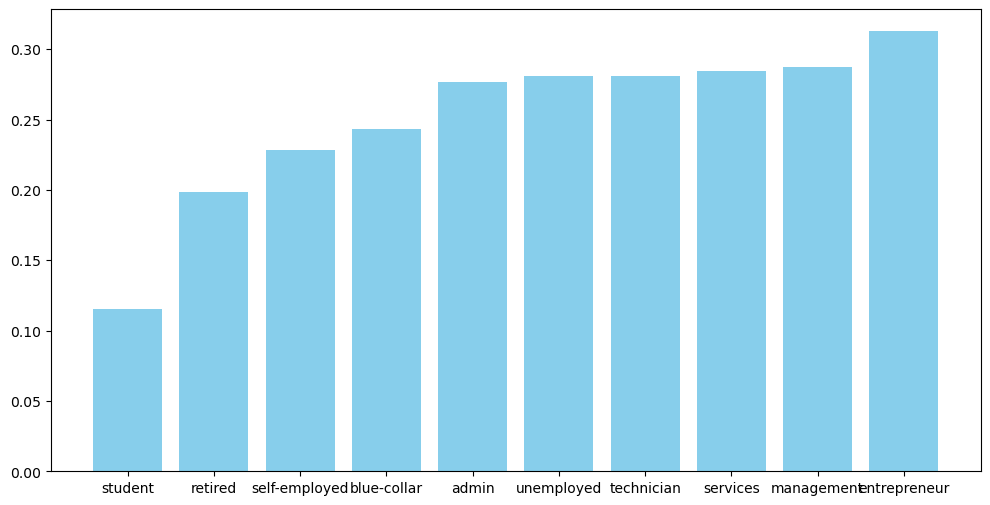

In [65]:
func('job',df2)

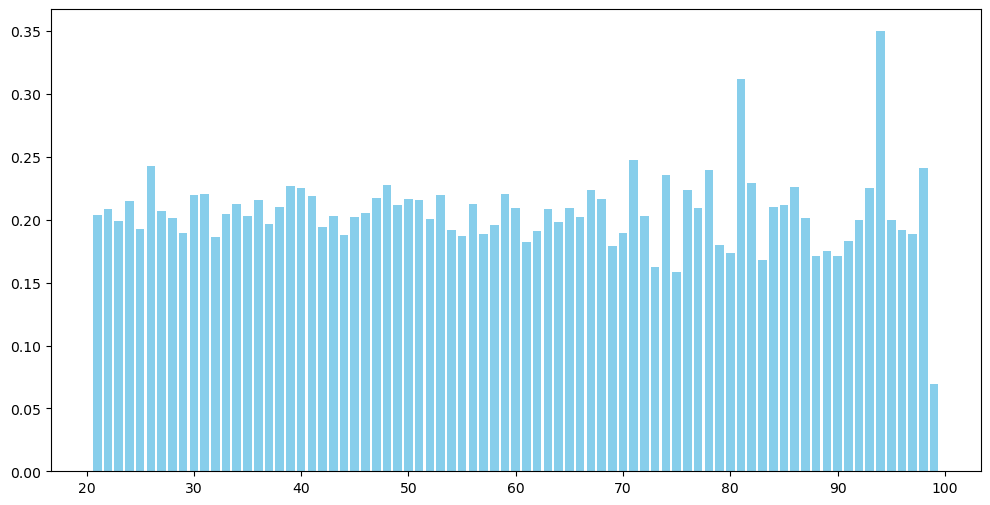

In [66]:
df_age = func('age',df2)

,customer_segment,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score
3,Retired,0.908830,0.231622,0.076386,0.097331,46557.226544,0.000000,0.107680
2,Middle-Market,0.906769,0.239676,0.080673,0.086207,46683.925289,0.265956,0.165430
0,Budget-Conscious,0.899000,0.232376,0.081133,0.092540,46741.335676,0.386467,0.187573
4,Young Professionals,0.907617,0.244717,0.078133,0.100246,46789.821170,0.488244,0.210130
1,High-Value,0.906576,0.245790,0.074980,0.092823,47033.616696,1.000000,0.311227


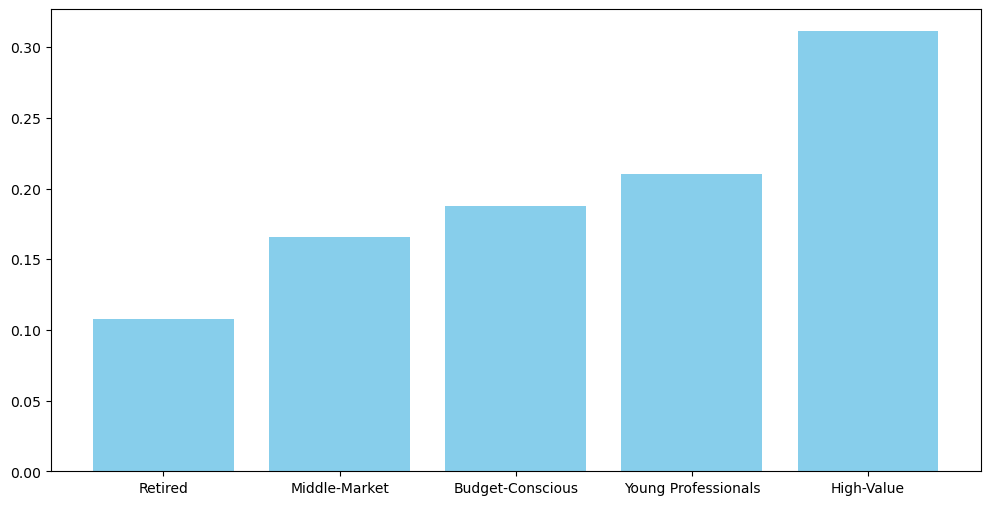

In [67]:
func("customer_segment",df2)

,education,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score
1,secondary,0.903795,0.239037,0.079560,0.093431,46698.893173,0.000000,0.111491
0,primary,0.903175,0.233686,0.079365,0.087302,46755.378150,0.401624,0.190113
2,tertiary,0.906645,0.240216,0.078577,0.091419,46839.534557,1.000000,0.311353


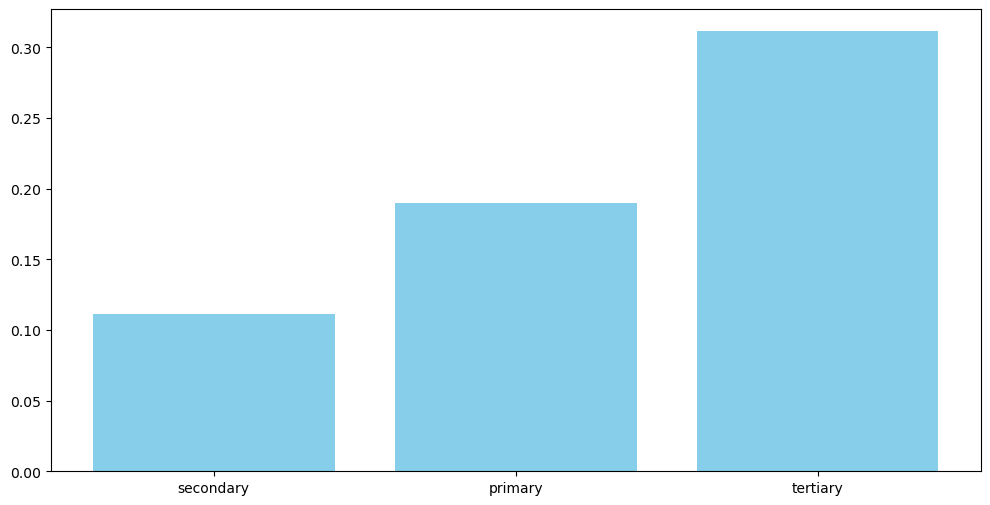

In [68]:
func('education',df2)

,Cluster,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score
0,0,0.909046,0.245803,0.080033,0.093236,46568.614588,0.000000,0.113757
1,1,0.903204,0.235633,0.080579,0.089450,46817.156589,0.902668,0.291513
2,2,0.904745,0.239023,0.068343,0.099504,46843.956101,1.000000,0.305878


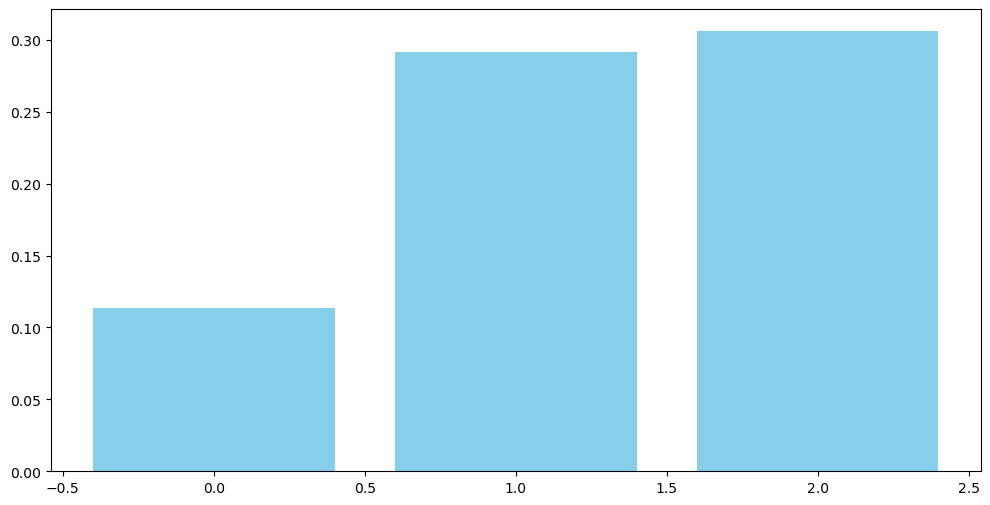

In [69]:
func("Cluster",df2)